<a href="https://colab.research.google.com/github/lilianapayares16-droid/BASE-CCVM-2024/blob/main/An%C3%A1lisis_exploratorio_y_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TFM - Predicción del riesgo cardiovascular mediante análisis exploratorio y modelos de Machine Learning sobre datos clínicos

In [23]:
# Librerías base
import numpy as np
import pandas as pd
from IPython.display import display


# Para Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Para el modelado - Preprocesamiento
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             RocCurveDisplay)

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_context("notebook")


# Fase I Analisis exploratorio de los datos

In [2]:
from google.colab import files
files.upload()


df = pd.read_excel("BASE CCVM 2024.xlsx")
df.head()

Saving BASE CCVM 2024.xlsx to BASE CCVM 2024.xlsx


,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,municipio_divipola,...,imc,clasificacion_imc,tension_arterial_sistolica,tension_arterial_diastolica,creatinina,hemoglobina_glicosilada,albuminuria,colesterol_total,resultado_hdl,resultado_ldl
0,1984-05-17,41,M,Adultez,Ninguna,Discapacidad,Multiple,Colombia,CÓRDOBA,23168,...,24.9,1,120,80,1.3,5.5,20,180.0,55.2,60.0
1,1942-05-24,83,M,Vejez,Negro,Otros,Sin discapacidad,Colombia,CÓRDOBA,23001,...,28.9,2,140,90,1.3,5.5,20,130.4,47.7,74.9
2,1977-09-10,47,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23001,...,21.4,1,110,60,1.3,5.5,20,150.0,55.2,60.0
3,1931-01-29,94,M,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23189,...,20.2,1,140,80,1.3,5.5,206,117.7,54.1,38.5
4,1935-12-31,89,F,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23162,...,31.1,3,140,70,1.3,6.1,17,118.2,28.0,49.1


In [3]:
## Fase I — Análisis Exploratorio (EDA)
print("Filas, columnas:", df.shape)
display(df.sample(5, random_state=42))

display(df.info())
display(df.describe(include="all").T.head(20))


Filas, columnas: (7341, 25)


,fecha_nacimiento,edad,sexo,curso_vida,pertenencia_etnica,grupo_poblacional,Discapacidad,pais,departamento,municipio_divipola,...,imc,clasificacion_imc,tension_arterial_sistolica,tension_arterial_diastolica,creatinina,hemoglobina_glicosilada,albuminuria,colesterol_total,resultado_hdl,resultado_ldl
5561,1955-08-11,69,F,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23417,...,26.4,2,130,80,1.0,4.9,15,193.0,54.3,107.0
2627,1991-04-03,34,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23001,...,26.6,2,110,70,0.7,5.3,15,160.4,52.4,99.6
457,1957-08-28,67,M,Vejez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23001,...,29.1,2,120,80,1.6,5.5,20,143.3,46.1,84.2
2995,1970-01-02,55,F,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23001,...,26.6,2,120,80,0.9,5.5,16,161.5,52.9,91.3
5351,1967-09-06,57,M,Adultez,Ninguna,Otros,Sin discapacidad,Colombia,CÓRDOBA,23417,...,30.1,3,140,90,1.7,6.9,18,192.0,34.0,98.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7341 entries, 0 to 7340
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha_nacimiento             7341 non-null   datetime64[ns]
 1   edad                         7341 non-null   int64         
 2   sexo                         7341 non-null   object        
 3   curso_vida                   7341 non-null   object        
 4   pertenencia_etnica           7341 non-null   object        
 5   grupo_poblacional            7341 non-null   object        
 6   Discapacidad                 7341 non-null   object        
 7   pais                         7341 non-null   object        
 8   departamento                 7341 non-null   object        
 9   municipio_divipola           7341 non-null   int64         
 10  municipio_residencia         7341 non-null   object        
 11  longitud                     7341 non-null 

None

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
fecha_nacimiento,7341,NaN,NaN,NaN,1959-12-20 21:46:24.961176960,1922-01-05 00:00:00,1952-04-03 00:00:00,1958-10-24 00:00:00,1967-09-25 00:00:00,2010-12-01 00:00:00,NaN
edad,7341.0,NaN,NaN,NaN,65.062934,18.0,57.0,66.0,73.0,103.0,11.542877
sexo,7341,2,F,4039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curso_vida,7341,4,Vejez,5110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pertenencia_etnica,7341,3,Ninguna,7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grupo_poblacional,7341,3,Otros,7310,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discapacidad,7341,3,Sin discapacidad,7331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pais,7341,1,Colombia,7341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departamento,7341,1,CÓRDOBA,7341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
municipio_divipola,7341.0,NaN,NaN,NaN,23175.31903,23001.0,23001.0,23001.0,23417.0,23855.0,241.584306


In [4]:
# Clasificación de variables
# Variables Sociodemográficas

vars_demo = [
    'edad',
    'sexo',
    'curso_vida'
]


In [5]:
# Variables Antropométricas

vars_antrop = [
    'peso',
    'talla',
    'imc',
    'clasificacion_imc'
]


In [6]:
# Variables Clínicas cardiovasculares

vars_clinicas = [
    'tension_arterial_sistolica',
    'tension_arterial_diastolica'
]


In [7]:
# Variables Metabólicas, renales y lipídicas

vars_labs = [
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]


In [9]:
# Variables numéricas

vars_numericas = [
    'edad',
    'peso',
    'talla',
    'imc',
    'tension_arterial_sistolica',
    'tension_arterial_diastolica',
    'creatinina',
    'hemoglobina_glicosilada',
    'albuminuria',
    'colesterol_total',
    'resultado_hdl',
    'resultado_ldl'
]

# Estadística descriptiva
desc_numericas = df[vars_numericas].describe().T

desc_numericas


,count,mean,std,min,25%,50%,75%,max
edad,7341.0,65.062934,11.542877,18.0,57.0,66.0,73.0,103.0
peso,7341.0,74.488898,14.352683,37.0,65.0,73.0,83.0,150.0
talla,7341.0,163.847024,8.673908,120.0,157.0,164.0,170.0,204.0
imc,7341.0,27.684157,4.548364,14.2,24.6,27.2,30.3,55.6
tension_arterial_sistolica,7341.0,124.116060,12.676294,70.0,120.0,120.0,130.0,220.0
tension_arterial_diastolica,7341.0,76.630704,8.061124,20.0,70.0,80.0,80.0,98.0
creatinina,7341.0,1.081147,0.260190,0.4,0.9,1.0,1.2,2.0
hemoglobina_glicosilada,7341.0,6.038455,1.240217,2.5,5.5,5.5,6.9,9.0
albuminuria,7341.0,72.365890,105.440398,5.0,12.0,20.0,50.0,338.0
colesterol_total,7341.0,185.824738,38.203327,70.0,160.0,187.0,217.0,318.7


In [12]:
#Variables categoricas
vars_categoricas = [
    'sexo',
    'curso_vida',
    'clasificacion_imc'
]

for var in vars_categoricas:
    print(f"\nDistribución de {var}")
    display(
        pd.DataFrame({
            'Frecuencia': df[var].value_counts(dropna=False),
            'Porcentaje (%)': df[var].value_counts(normalize=True, dropna=False) * 100
        })
    )



Distribución de sexo


,Frecuencia,Porcentaje (%)
sexo,,
F,4039,55.019752
M,3302,44.980248



Distribución de curso_vida


,Frecuencia,Porcentaje (%)
curso_vida,,
Vejez,5110,69.609045
Adultez,2217,30.200245
Juventud,13,0.177088
Adolescencia,1,0.013622



Distribución de clasificacion_imc


,Frecuencia,Porcentaje (%)
clasificacion_imc,,
2,3354,45.688598
3,1990,27.108023
1,1937,26.386051
0,60,0.817327


In [10]:
# Valores nulos
missing = (df.isna().mean()*100).sort_values(ascending=False)
missing = missing[missing > 0]

if missing.empty:
    print("Sin valores faltantes")
else:
    plt.figure()
    missing.head(20).plot(kind="bar")
    plt.title("% de valores faltantes (top 20)")
    plt.ylabel("%")
    plt.show()



Sin valores faltantes


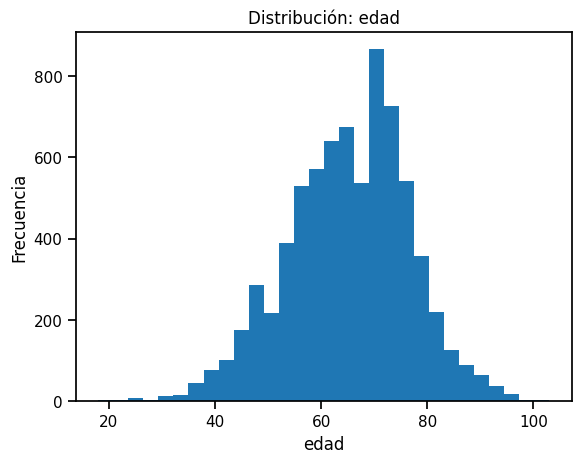

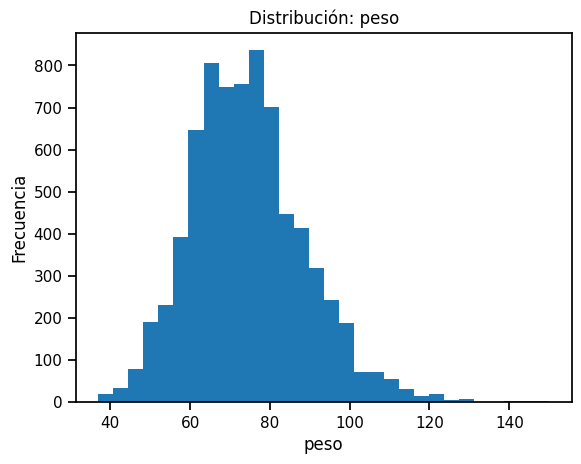

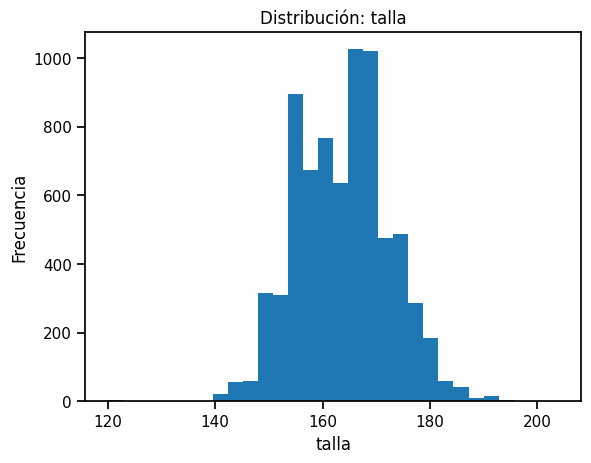

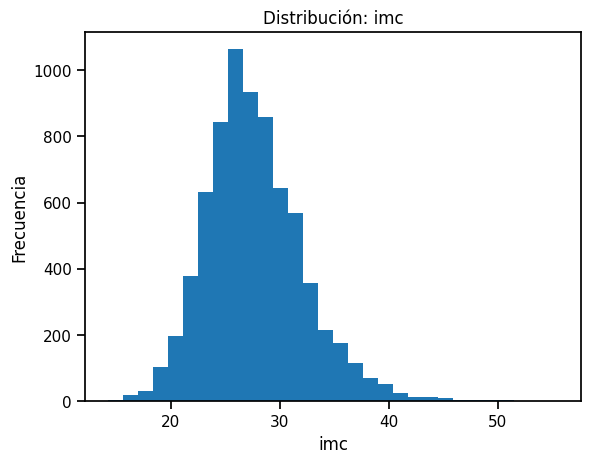

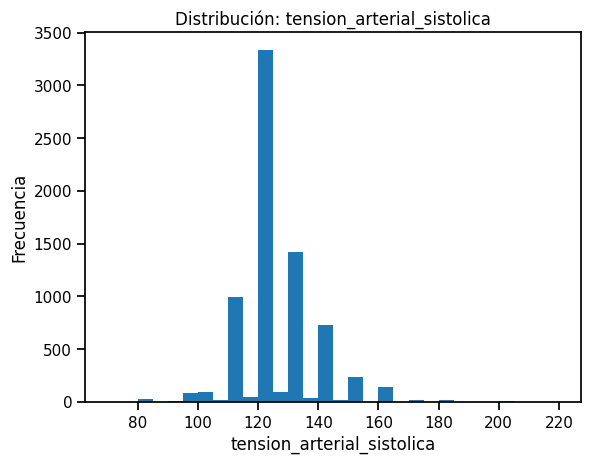

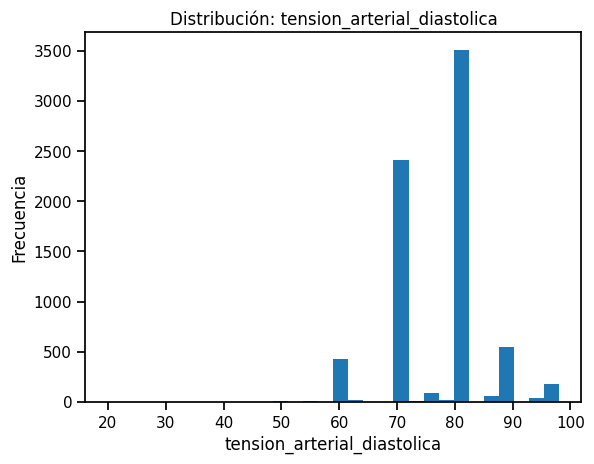

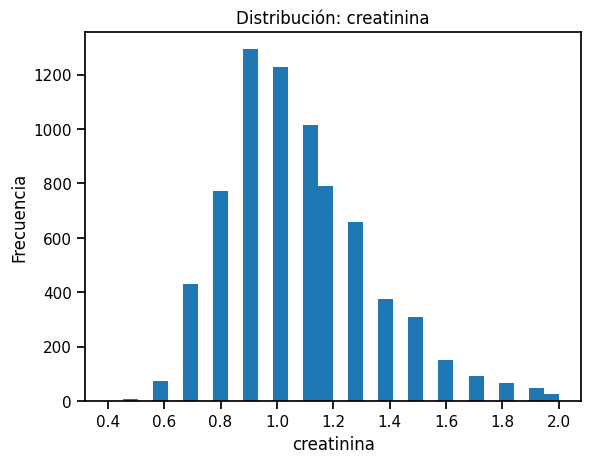

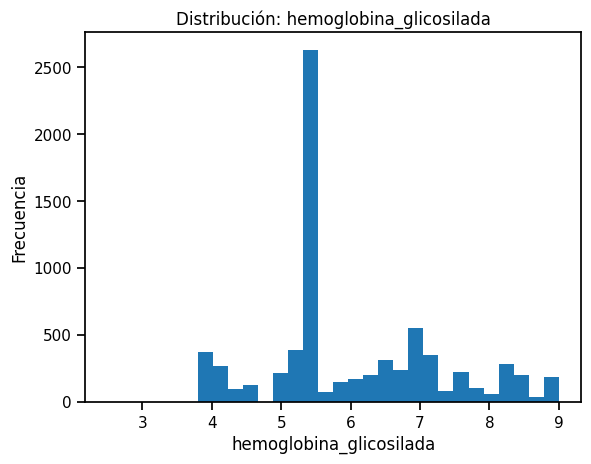

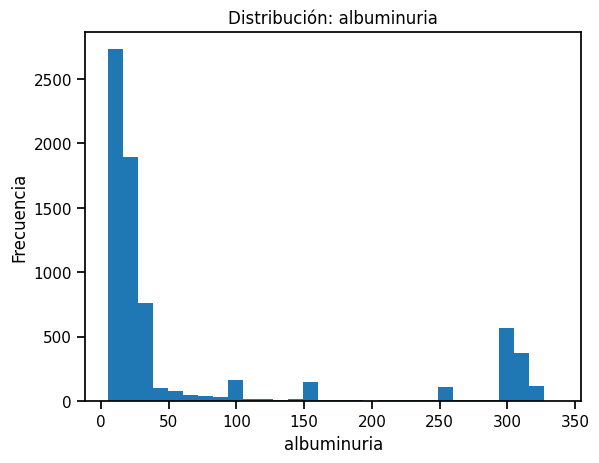

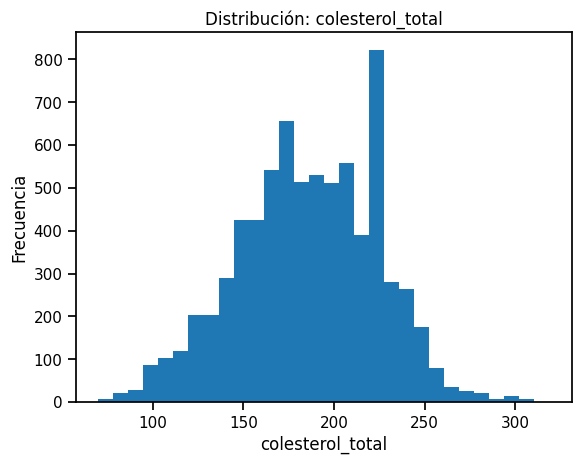

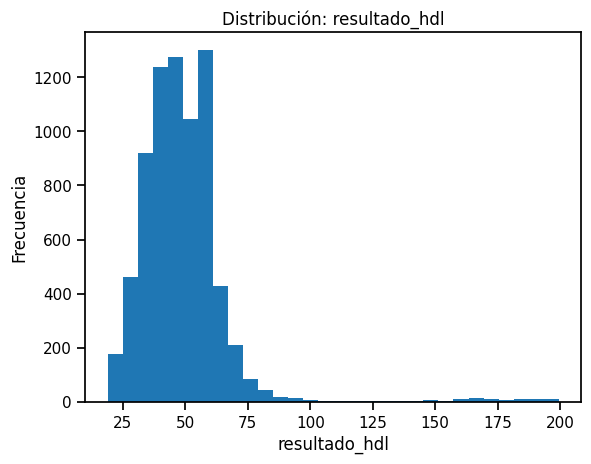

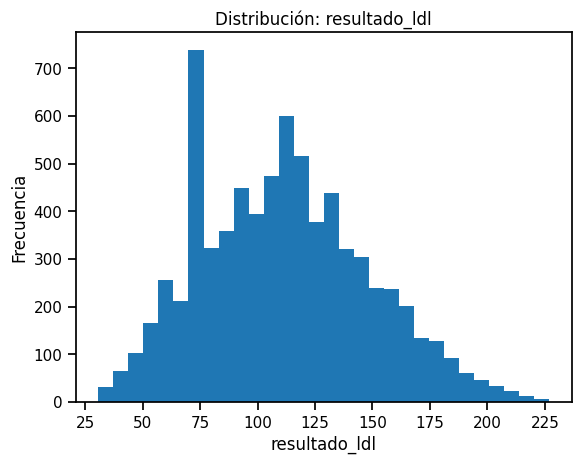

In [ ]:
#Distribución de variables númericas

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
excluir_cols = ["longitud","latitud", "municipio_divipola", "clasificacion_imc"]
num_cols_validas = [c for c in num_cols if c not in excluir_cols]

for col in num_cols_validas[:12]:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribución: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Fase II — Preparación y Preprocesamiento

In [13]:
#Variables

vars_numericas = [
    'edad', 'peso', 'talla', 'imc',
    'tension_arterial_sistolica', 'tension_arterial_diastolica',
    'creatinina', 'hemoglobina_glicosilada', 'albuminuria',
    'colesterol_total', 'resultado_hdl', 'resultado_ldl'
]

vars_categoricas = [
    'sexo', 'curso_vida', 'clasificacion_imc'
]

# Convertir numéricas
for col in vars_numericas:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Normalizar categóricas
for col in vars_categoricas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan})

In [16]:
# Reglas clínicas simples para depurar errores evidentes

def set_nan_if_out_of_range(s, low=None, high=None):
    s = s.copy()
    if low is not None:
        s = s.where(s >= low, np.nan)
    if high is not None:
        s = s.where(s <= high, np.nan)
    return s


# Aplicar reglas clínicas

if 'edad' in df.columns:
    df['edad'] = set_nan_if_out_of_range(df['edad'], low=0, high=110)

if 'tension_arterial_sistolica' in df.columns:
    df['tension_arterial_sistolica'] = set_nan_if_out_of_range(
        df['tension_arterial_sistolica'], low=60, high=260
    )

if 'tension_arterial_diastolica' in df.columns:
    df['tension_arterial_diastolica'] = set_nan_if_out_of_range(
        df['tension_arterial_diastolica'], low=30, high=160
    )

if 'imc' in df.columns:
    df['imc'] = set_nan_if_out_of_range(df['imc'], low=10, high=70)

In [17]:
#Definir variable objetivo (target)


# Inicializar contador de factores de riesgo
df['factores_riesgo'] = 0

# Hipertensión
df.loc[
    (df['tension_arterial_sistolica'] >= 140) |
    (df['tension_arterial_diastolica'] >= 90),
    'factores_riesgo'
] += 1

# Dislipidemia
df.loc[
    (df['resultado_ldl'] >= 130) |
    (df['colesterol_total'] >= 200),
    'factores_riesgo'
] += 1

# Diabetes (HbA1c)
df.loc[
    df['hemoglobina_glicosilada'] >= 6.5,
    'factores_riesgo'
] += 1

# Sobrepeso u obesidad
df.loc[
    df['imc'] >= 25,
    'factores_riesgo'
] += 1

# Daño renal (albuminuria elevada)
df.loc[
    df['albuminuria'] > 300,
    'factores_riesgo'
] += 1

# Crear variable objetivo binaria
df['riesgo_cardiovascular'] = np.where(
    df['factores_riesgo'] >= 2, 1, 0
)

# Ver distribución
df['riesgo_cardiovascular'].value_counts(normalize=True).round(3)


,proportion
riesgo_cardiovascular,
1,0.563
0,0.437


In [18]:
df['factores_riesgo'].value_counts().sort_index()


,count
factores_riesgo,
0,834
1,2375
2,2318
3,1373
4,405
5,36


In [19]:
# Definir variable objetivo (target) y preparar dataset

target = 'riesgo_cardiovascular'
if target not in df.columns:
    raise ValueError(f"No encuentro la columna objetivo '{target}'.")

# Por seguridad: quedarnos solo con filas donde el target NO sea NaN
df = df.dropna(subset=[target]).copy()

# Asegurar que target sea binario 0/1
df[target] = df[target].astype(int)
if set(df[target].unique()) - {0, 1}:
    raise ValueError("El target no quedó binario (0/1)")

# Mantener solo columnas necesarias
cols_modelo = [c for c in (vars_numericas + vars_categoricas + [target]) if c in df.columns]
df_modelo = df[cols_modelo].copy()

# Separar X e y
X = df_modelo.drop(columns=[target])
y = df_modelo[target]


In [20]:
# Preprocesadores (imputación + encoding + escalado)

# Numéricas: imputación por mediana
num_pipeline_rf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Numéricas para logística: imputación + estandarización
num_pipeline_logreg = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categóricas: imputación + one-hot
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformers
preprocess_logreg = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_logreg, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

preprocess_rf = ColumnTransformer(
    transformers=[
        ("num", num_pipeline_rf, [c for c in vars_numericas if c in X.columns]),
        ("cat", cat_pipeline, [c for c in vars_categoricas if c in X.columns])
    ],
    remainder="drop"
)

In [21]:
#Listo para modelar)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

print("\n✅ Datos listos")
print("Train:", X_train.shape, "Test:", X_test.shape)
print("Distribución del target (train):")
print(y_train.value_counts(normalize=True).round(3))



✅ Datos listos
Train: (5138, 15) Test: (2203, 15)
Distribución del target (train):
riesgo_cardiovascular
1    0.563
0    0.437
Name: proportion, dtype: float64


# Fase III. Modelado Predictivo del Riesgo Cardiovascular

In [28]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [24]:
# Regresión Logística

pipe_logreg = Pipeline(steps=[
    ("preprocess", preprocess_logreg),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])


In [25]:
# Random Forest

pipe_rf = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        class_weight="balanced",
        max_depth=None,
        n_jobs=-1
    ))
])

In [26]:
# XGBoost

pos = (y_train == 1).sum()
neg = (y_train == 0).sum()
scale_pos_weight = neg / pos if pos > 0 else 1

pipe_xgb = Pipeline(steps=[
    ("preprocess", preprocess_rf),
    ("model", XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight
    ))
])


In [29]:
# Entrenar y evaluar modelos en un solo bloque

modelos = {
    "LogisticRegression": pipe_logreg,
    "RandomForest": pipe_rf,
    "XGBoost": pipe_xgb
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "AUC": roc_auc_score(y_test, y_prob)
    })

    print(f"\n===== {nombre} =====")
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

df_resultados = pd.DataFrame(resultados).sort_values(by="AUC", ascending=False)
df_resultados



===== LogisticRegression =====
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       963
           1       0.93      0.89      0.90      1240

    accuracy                           0.90      2203
   macro avg       0.89      0.90      0.89      2203
weighted avg       0.90      0.90      0.90      2203

Matriz de confusión:
 [[ 874   89]
 [ 142 1098]]

===== RandomForest =====
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       963
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2203
   macro avg       1.00      1.00      1.00      2203
weighted avg       1.00      1.00      1.00      2203

Matriz de confusión:
 [[ 961    2]
 [   5 1235]]

===== XGBoost =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       963
           1       1.00      1.00      1.00      1240

    a

,Modelo,Accuracy,Precision,Recall,F1,AUC
2,XGBoost,0.999092,0.999194,0.999194,0.999194,0.999935
1,RandomForest,0.996823,0.998383,0.995968,0.997174,0.999919
0,LogisticRegression,0.895143,0.925021,0.885484,0.904821,0.965867


<Figure size 700x500 with 0 Axes>

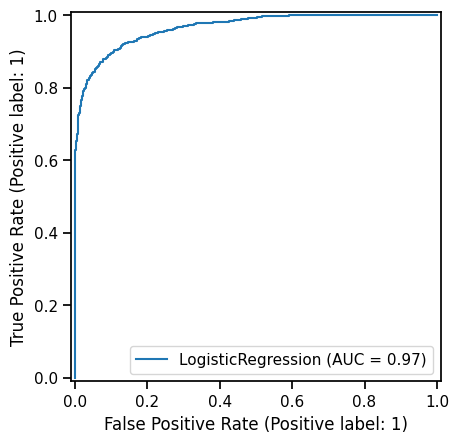

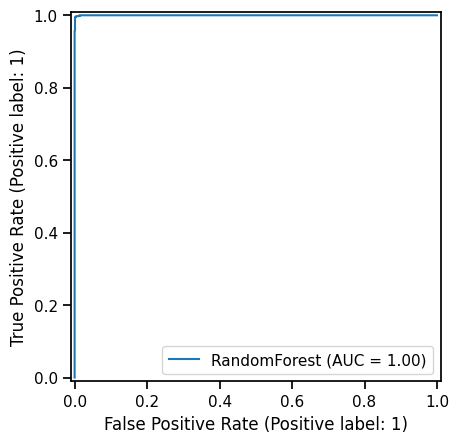

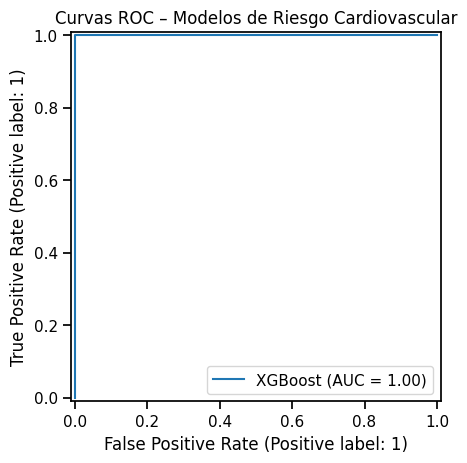

In [30]:
# Curvas ROC comparadas

plt.figure(figsize=(7,5))

for nombre, modelo in modelos.items():
    y_prob = modelo.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_prob, name=nombre)

plt.title("Curvas ROC – Modelos de Riesgo Cardiovascular")
plt.show()


In [31]:
#Importancia de variables (Random Forest y XGBoost)


rf_model = pipe_rf.named_steps["model"]
rf_pre = pipe_rf.named_steps["preprocess"]

feature_names = rf_pre.get_feature_names_out()
importances = rf_model.feature_importances_

imp_rf = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .head(15)
)

imp_rf


,feature,importance
7,num__hemoglobina_glicosilada,0.185222
9,num__colesterol_total,0.163519
3,num__imc,0.131723
11,num__resultado_ldl,0.098092
4,num__tension_arterial_sistolica,0.086431
19,cat__clasificacion_imc_1,0.083935
21,cat__clasificacion_imc_3,0.057176
5,num__tension_arterial_diastolica,0.042358
20,cat__clasificacion_imc_2,0.038516
1,num__peso,0.038189


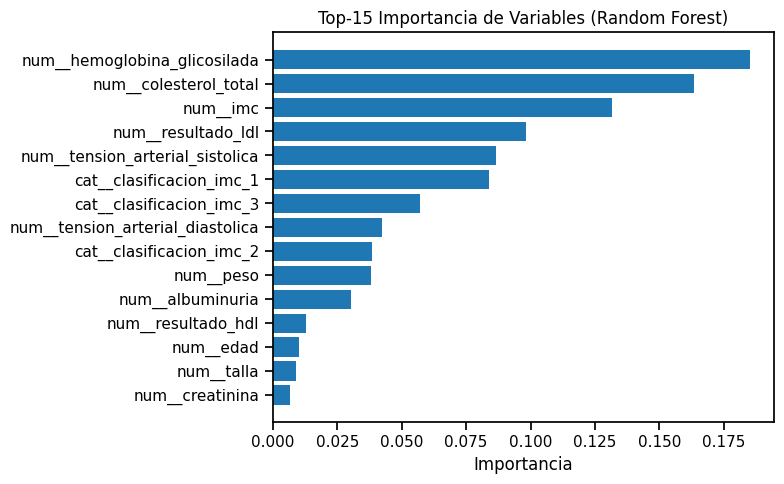

In [32]:
#Top-15

plt.figure(figsize=(8,5))
plt.barh(imp_rf["feature"][::-1], imp_rf["importance"][::-1])
plt.title("Top-15 Importancia de Variables (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()


In [33]:
#XGBoost (importancia)
xgb_model = pipe_xgb.named_steps["model"]
xgb_pre = pipe_xgb.named_steps["preprocess"]

feature_names_xgb = xgb_pre.get_feature_names_out()
importances_xgb = xgb_model.feature_importances_

imp_xgb = (
    pd.DataFrame({"feature": feature_names_xgb, "importance": importances_xgb})
    .sort_values("importance", ascending=False)
    .head(15)
)

imp_xgb


,feature,importance
7,num__hemoglobina_glicosilada,0.245490
3,num__imc,0.199479
9,num__colesterol_total,0.147914
19,cat__clasificacion_imc_1,0.097544
4,num__tension_arterial_sistolica,0.088633
5,num__tension_arterial_diastolica,0.059745
18,cat__clasificacion_imc_0,0.046165
11,num__resultado_ldl,0.042807
8,num__albuminuria,0.035295
20,cat__clasificacion_imc_2,0.023623


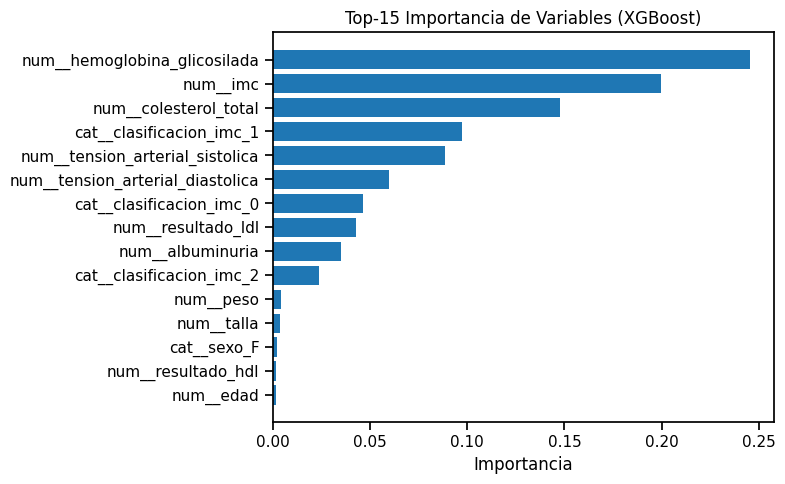

In [34]:
#Top 15
plt.figure(figsize=(8,5))
plt.barh(imp_xgb["feature"][::-1], imp_xgb["importance"][::-1])
plt.title("Top-15 Importancia de Variables (XGBoost)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()
